In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
marks = np.array([67,76,48,82,65,70,73,75,14,65,68,48,56,83,80,74,66,63,59])

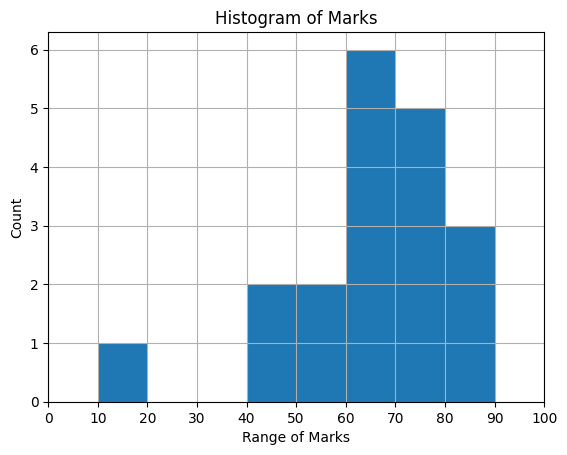

In [15]:
plt.title("Histogram of Marks")
plt.xlabel("Range of Marks")
plt.ylabel("Count")
plt.xticks(range(0,101,10))
plt.xlim(0,100)
plt.grid()
plt.hist(marks, bins = range(0,101,10));

In [16]:
import seaborn as sns

<Axes: ylabel='Density'>

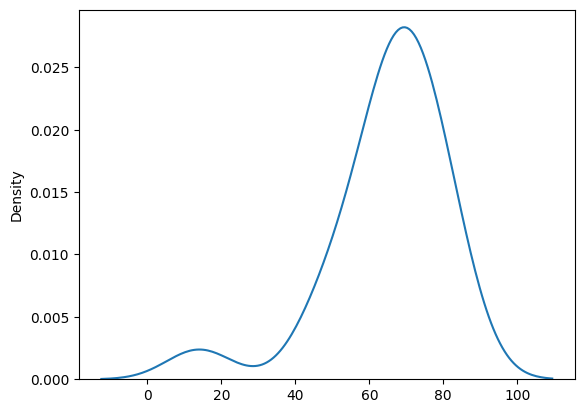

In [17]:
sns.kdeplot(marks)

<Axes: ylabel='Count'>

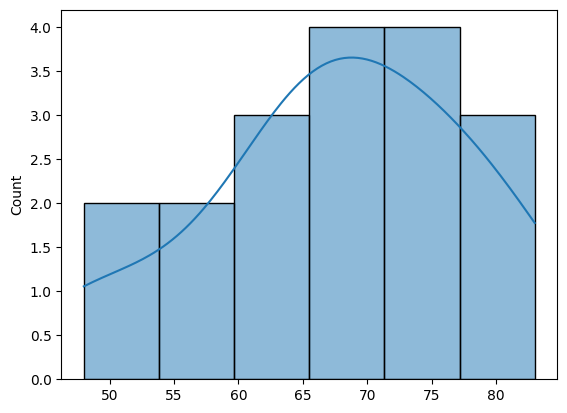

In [13]:
sns.histplot(marks, kde=True)

##### Histogram for Images

In [19]:
import cv2

In [21]:
img = cv2.imread("images/lenna.png", 0)

In [22]:
img

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [23]:
512*512

262144

In [25]:
from collections import Counter
Counter(img.flatten())

Counter({59: 6460,
         61: 5922,
         56: 5472,
         64: 5104,
         151: 4821,
         160: 4692,
         156: 4627,
         144: 4435,
         66: 4325,
         164: 4174,
         53: 3583,
         68: 3100,
         167: 2888,
         142: 2685,
         114: 2673,
         139: 2650,
         141: 2629,
         140: 2626,
         112: 2598,
         115: 2588,
         155: 2507,
         153: 2506,
         70: 2479,
         143: 2411,
         154: 2411,
         152: 2411,
         138: 2409,
         116: 2403,
         111: 2398,
         161: 2352,
         159: 2346,
         163: 2278,
         158: 2277,
         157: 2240,
         150: 2237,
         170: 2222,
         162: 2221,
         50: 2211,
         137: 2198,
         117: 2126,
         72: 2093,
         149: 2058,
         118: 2027,
         136: 2022,
         110: 2021,
         145: 1980,
         180: 1979,
         178: 1969,
         173: 1955,
         148: 1939,
         1

In [27]:
h = cv2.calcHist([img], [0], None, [256],[0,255])

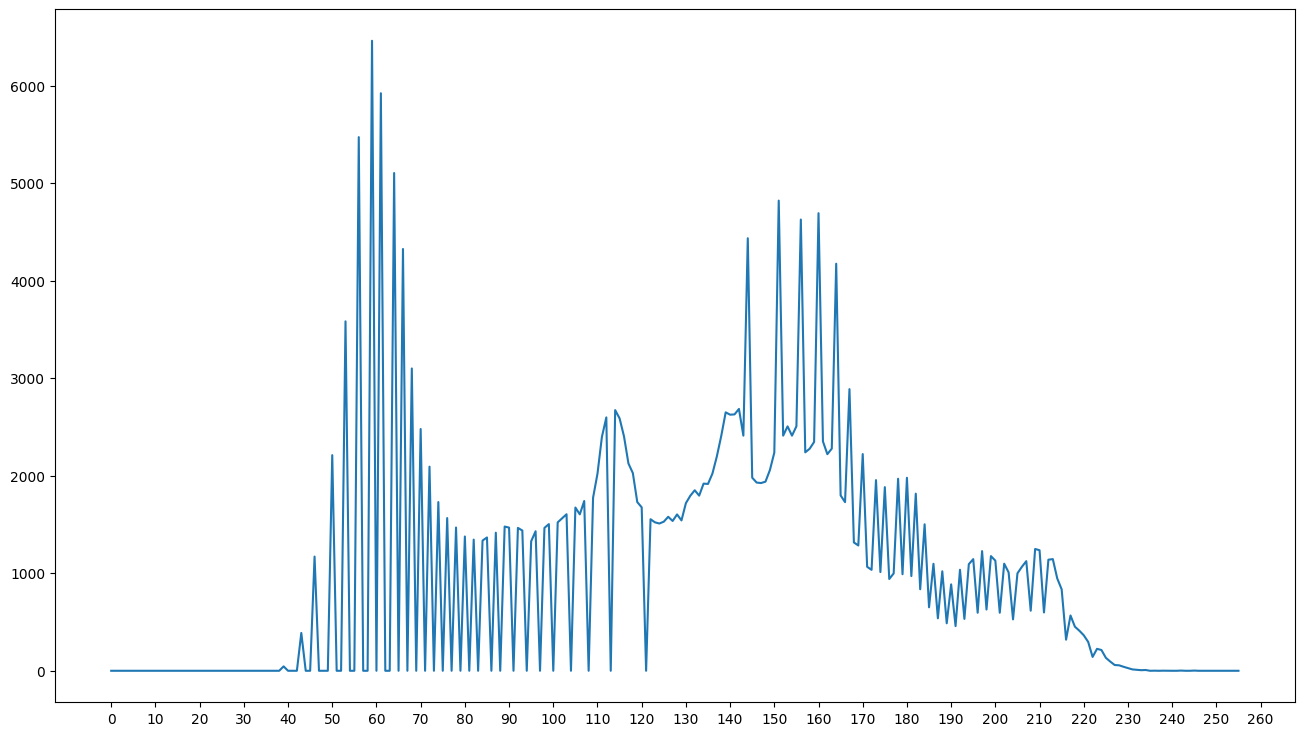

In [30]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,261,10))
plt.plot(h);

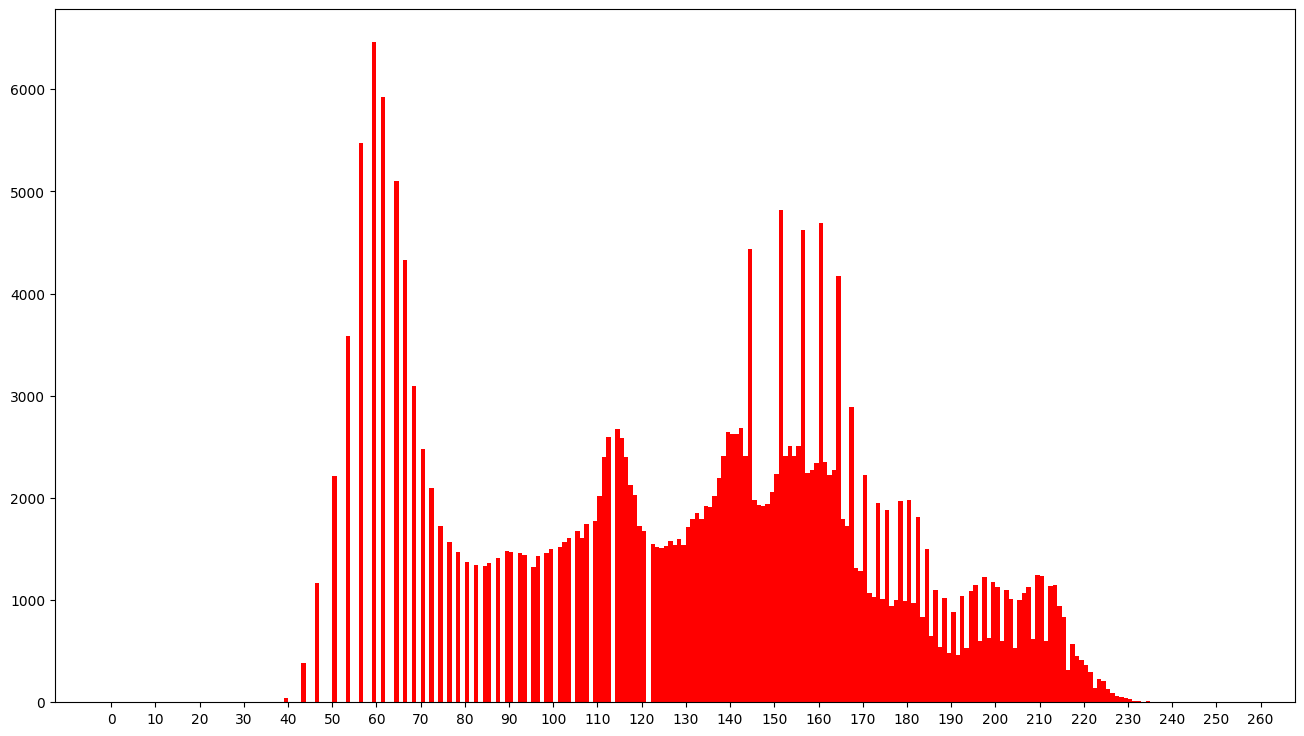

In [35]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,261,10))
plt.hist(img.flatten(), bins = range(0,256), color = 'r');

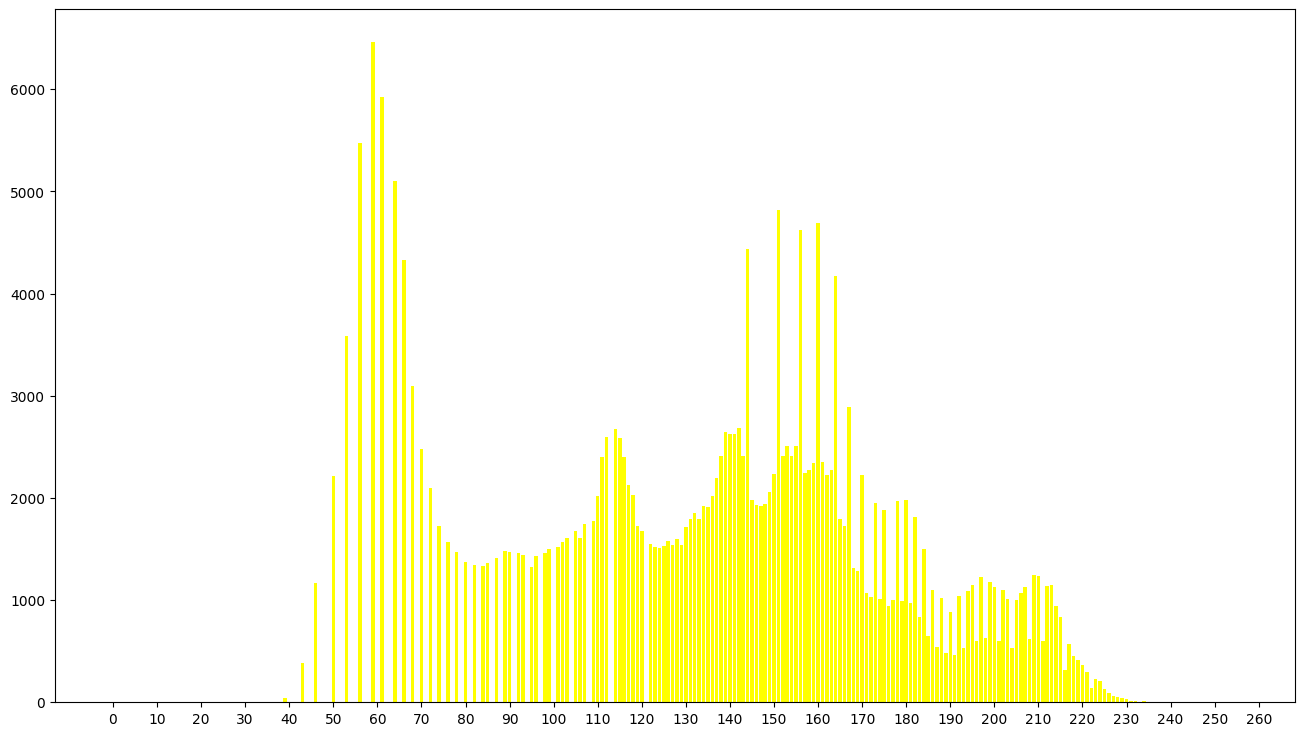

In [38]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,261,10))
plt.bar(range(0,256), h.flatten(), color = 'yellow');

In [39]:
img.mean()

132.42729568481445

In [40]:
img.std()

44.90209985629212

In [41]:
import seaborn as sns

<Axes: ylabel='Density'>

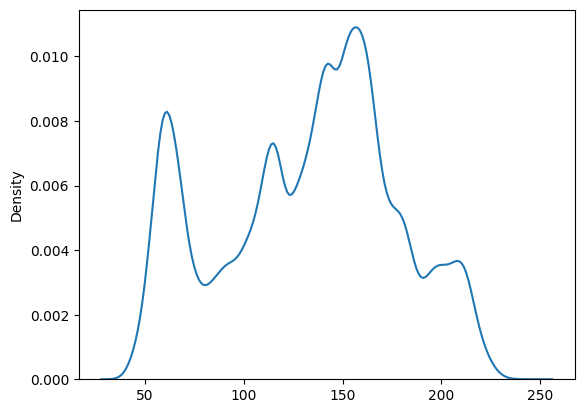

In [42]:
sns.kdeplot(img.flatten())

##### Histogram of Color Images

In [44]:
img_col = cv2.imread("images/lenna.png")

In [45]:
b, g, r = cv2.split(img_col)

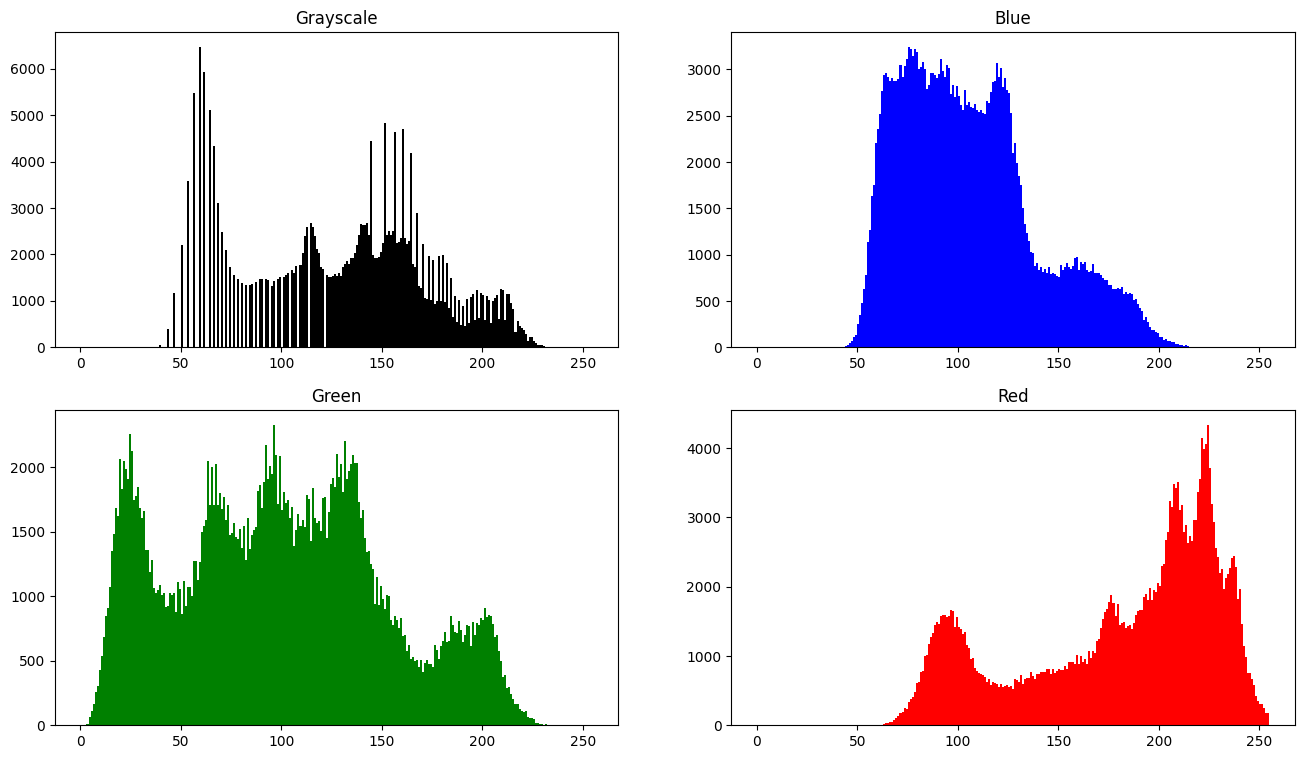

In [52]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.title("Grayscale")
plt.hist(img.flatten(), bins = range(0,256), color = 'k');
plt.subplot(2,2,2)
plt.title("Blue")
plt.hist(b.flatten(), bins = range(0,256), color = 'b');
plt.subplot(2,2,3)
plt.title("Green")
plt.hist(g.flatten(), bins = range(0,256), color = 'g');
plt.subplot(2,2,4)
plt.title("Red")
plt.hist(r.flatten(), bins = range(0,256), color = 'r');

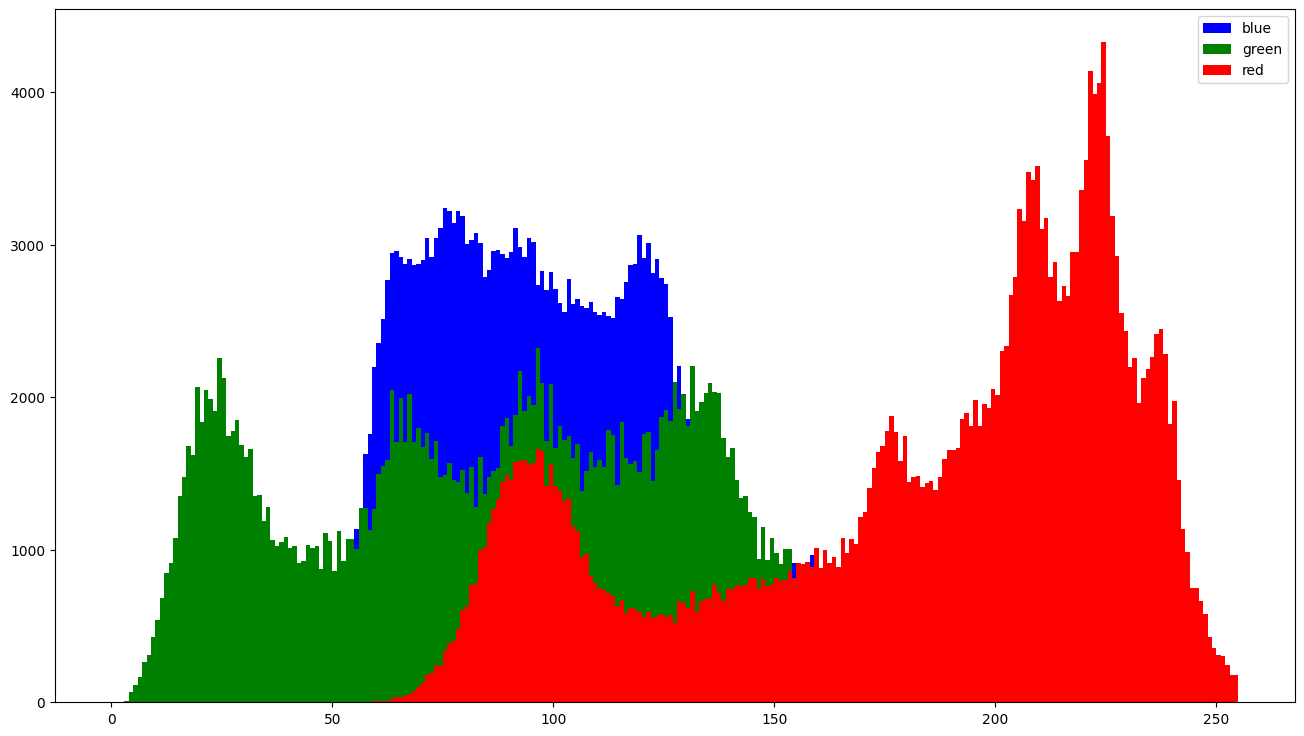

In [54]:
plt.figure(figsize=(16,9))
plt.hist(b.flatten(), bins = range(0,256), color = 'b', label = 'blue');
plt.hist(g.flatten(), bins = range(0,256), color = 'g', label = 'green');
plt.hist(r.flatten(), bins = range(0,256), color = 'r', label = 'red');
plt.legend()

##### Stretching and Shrinking of images

In [59]:
# stretching of image
img_stre = cv2.resize(img, None, fx = 2.0, fy = 1.0, 
                      interpolation = cv2.INTER_CUBIC)

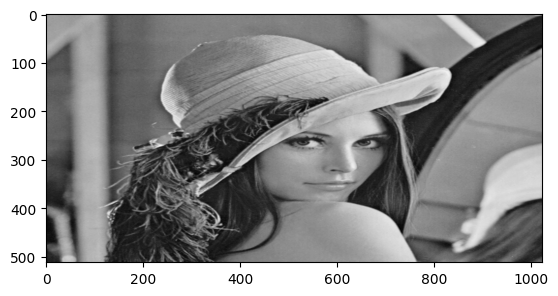

In [60]:
plt.imshow(img_stre, cmap = 'gray')

In [61]:
# shrinking of image
img_shri = cv2.resize(img, None, fx = 1.0, fy = 0.5, 
                      interpolation = cv2.INTER_CUBIC)

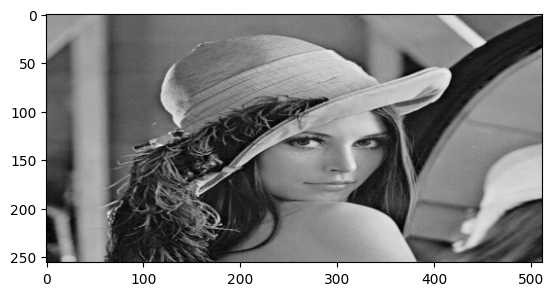

In [62]:
plt.imshow(img_shri, cmap = 'gray')

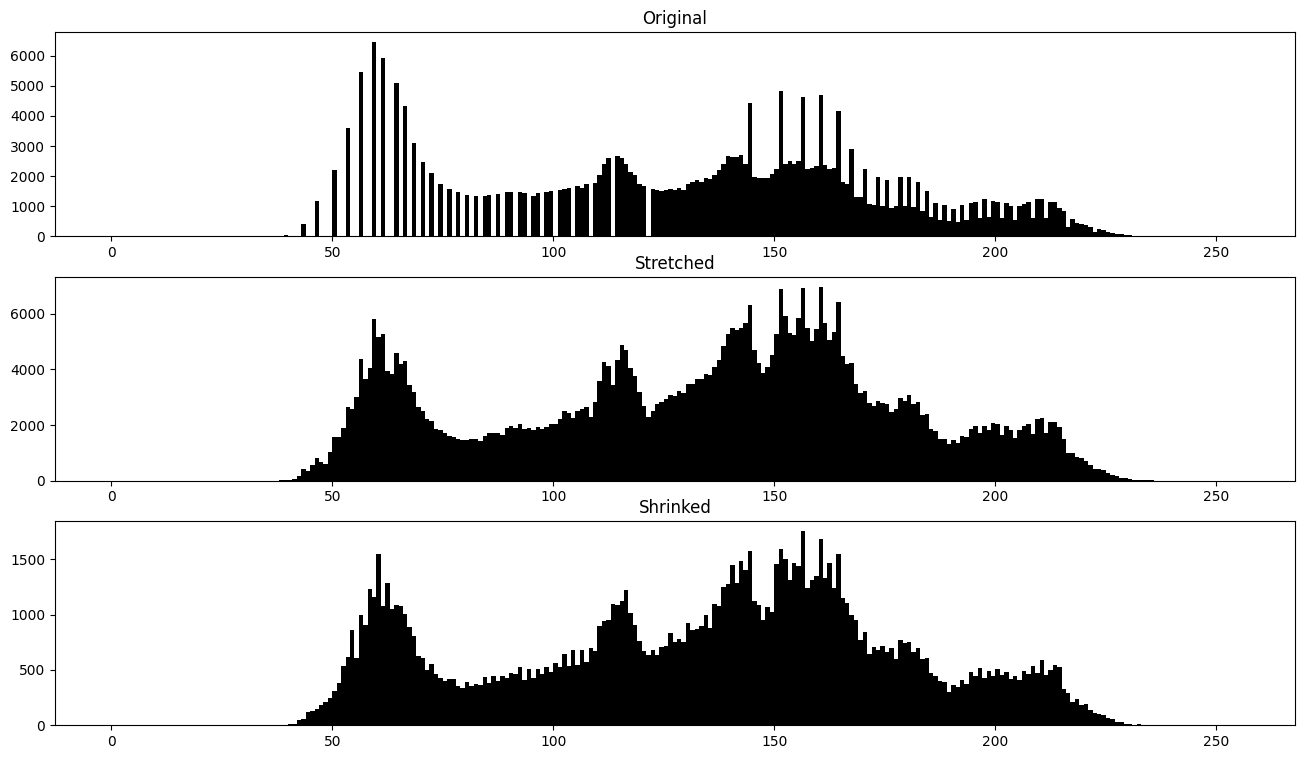

In [67]:
plt.figure(figsize=(16,9))
plt.subplot(311)
plt.title("Original")
plt.hist(img.flatten(), bins = range(0,256), color = 'k');
plt.subplot(312)
plt.title("Stretched")
plt.hist(img_stre.flatten(), bins = range(0,256), color = 'k');
plt.subplot(313)
plt.title("Shrinked")
plt.hist(img_shri.flatten(), bins = range(0,256), color = 'k');

##### Histogram Equalization

In [69]:
img_equ1 = cv2.equalizeHist(img)

In [70]:
img_equ1.mean()

128.65707778930664

In [71]:
img_equ1.std()

73.32327381285562

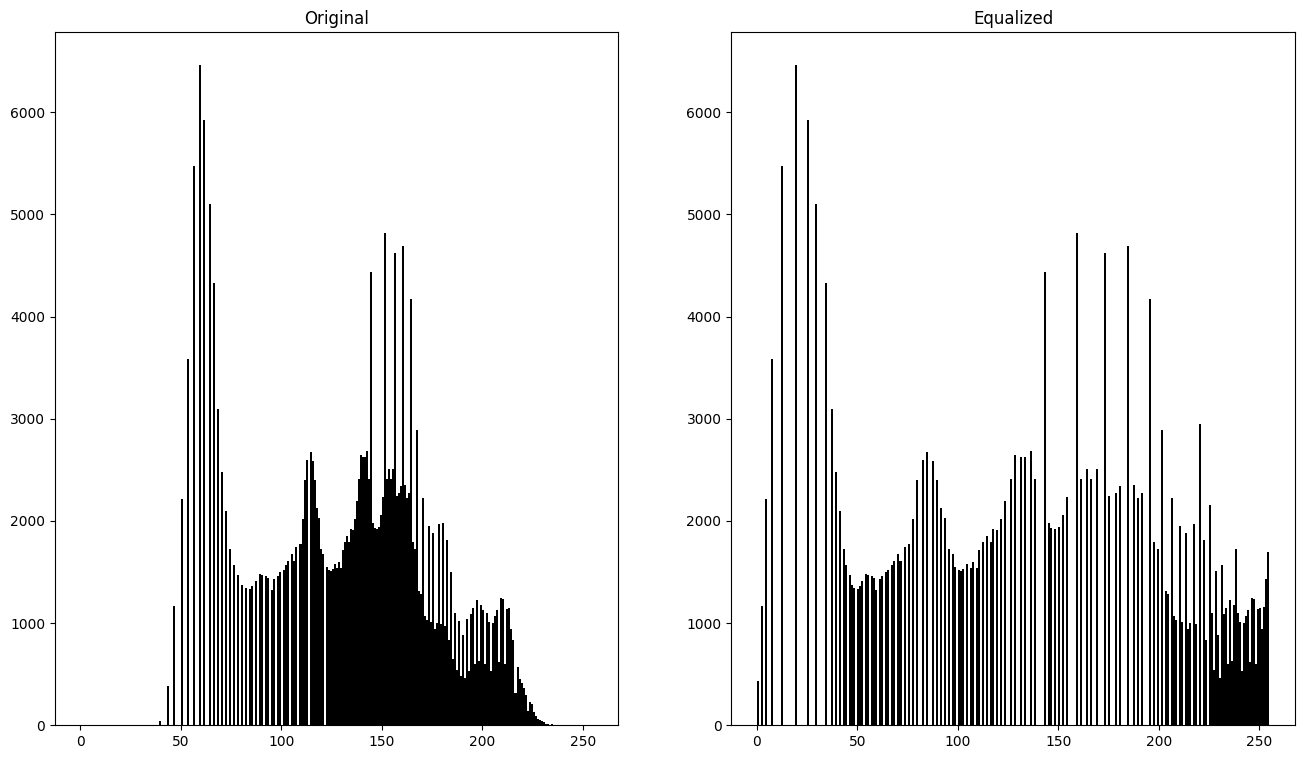

In [76]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title("Original")
plt.hist(img.flatten(), bins = range(0,256), color = 'k');
plt.subplot(122)
plt.title("Equalized")
plt.hist(img_equ1.flatten(), bins = range(0,256), color = 'k');

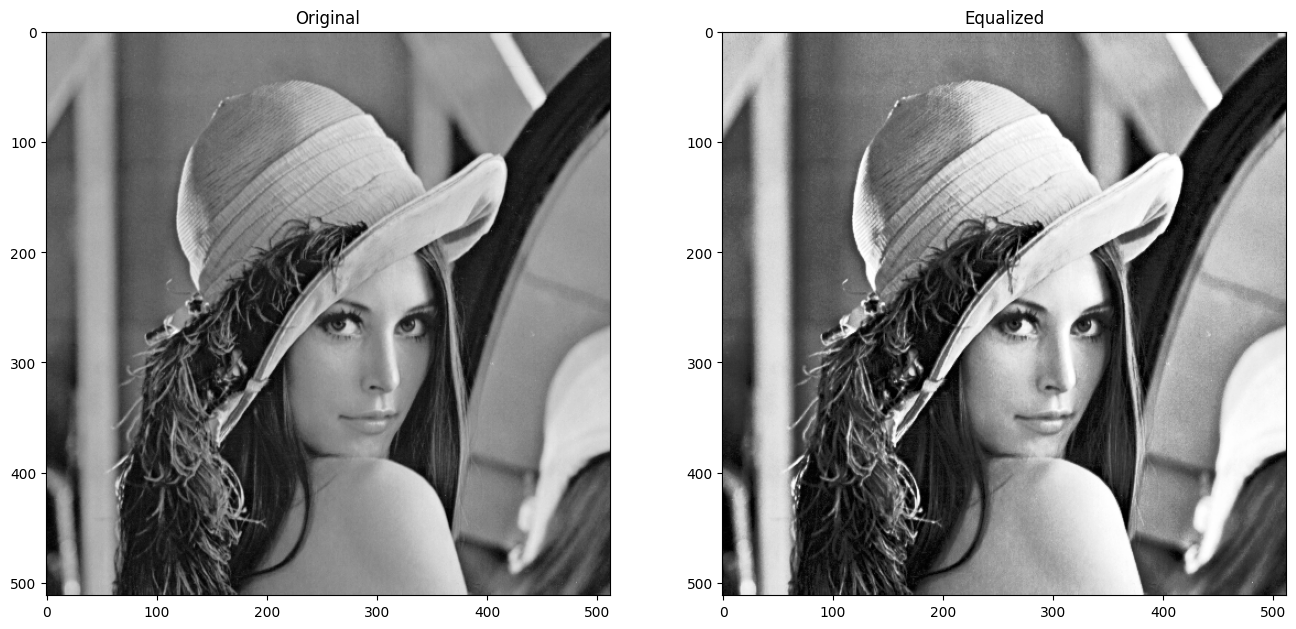

In [77]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title("Original")
plt.imshow(img, cmap = 'gray');
plt.subplot(122)
plt.title("Equalized")
plt.imshow(img_equ1, cmap = 'gray');

In [78]:
img_equ2 = cv2.equalizeHist(img_col)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


In [79]:
img_col

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]